In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import lsst.daf.butler as dafButler
butler = dafButler.Butler('/dc2/dc2')

In [2]:
calexp_collection1 = 'u/nsedaghat/Dataset0.1.1-sciCalexps/20220521T042355Z'
calexp_collection2 = 'u/nsedaghat/RegeneratedCalexps_w_2022_20_nobfk/20231002T214649Z'
template_collection1 = 'u/nsedaghat/DLDataset0.1.1-templates/20220522T031531Z'
template_collection2 = 'u/nsedaghat/DLDataset0.1.2-templates/20231004T071202Z'
diff_collection1 = 'u/nsedaghat/DLDataset0.1.1-diffs/20220522T064105Z'
diff_collection2 = 'u/nsedaghat/DLDataset0.1.2-diffs/20231004T201903Z'


In [3]:
from astropy.visualization import ZScaleInterval

def good_imshow(img, title=None, do_zscale=True):
    zscale = ZScaleInterval()

    if do_zscale:
        vmin, vmax = zscale.get_limits(img)
    else:
        vmin = vmax = None
    
    plt.imshow(img, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')

### Find initial statistics about calexp-visits

<IPython.core.display.Javascript object>


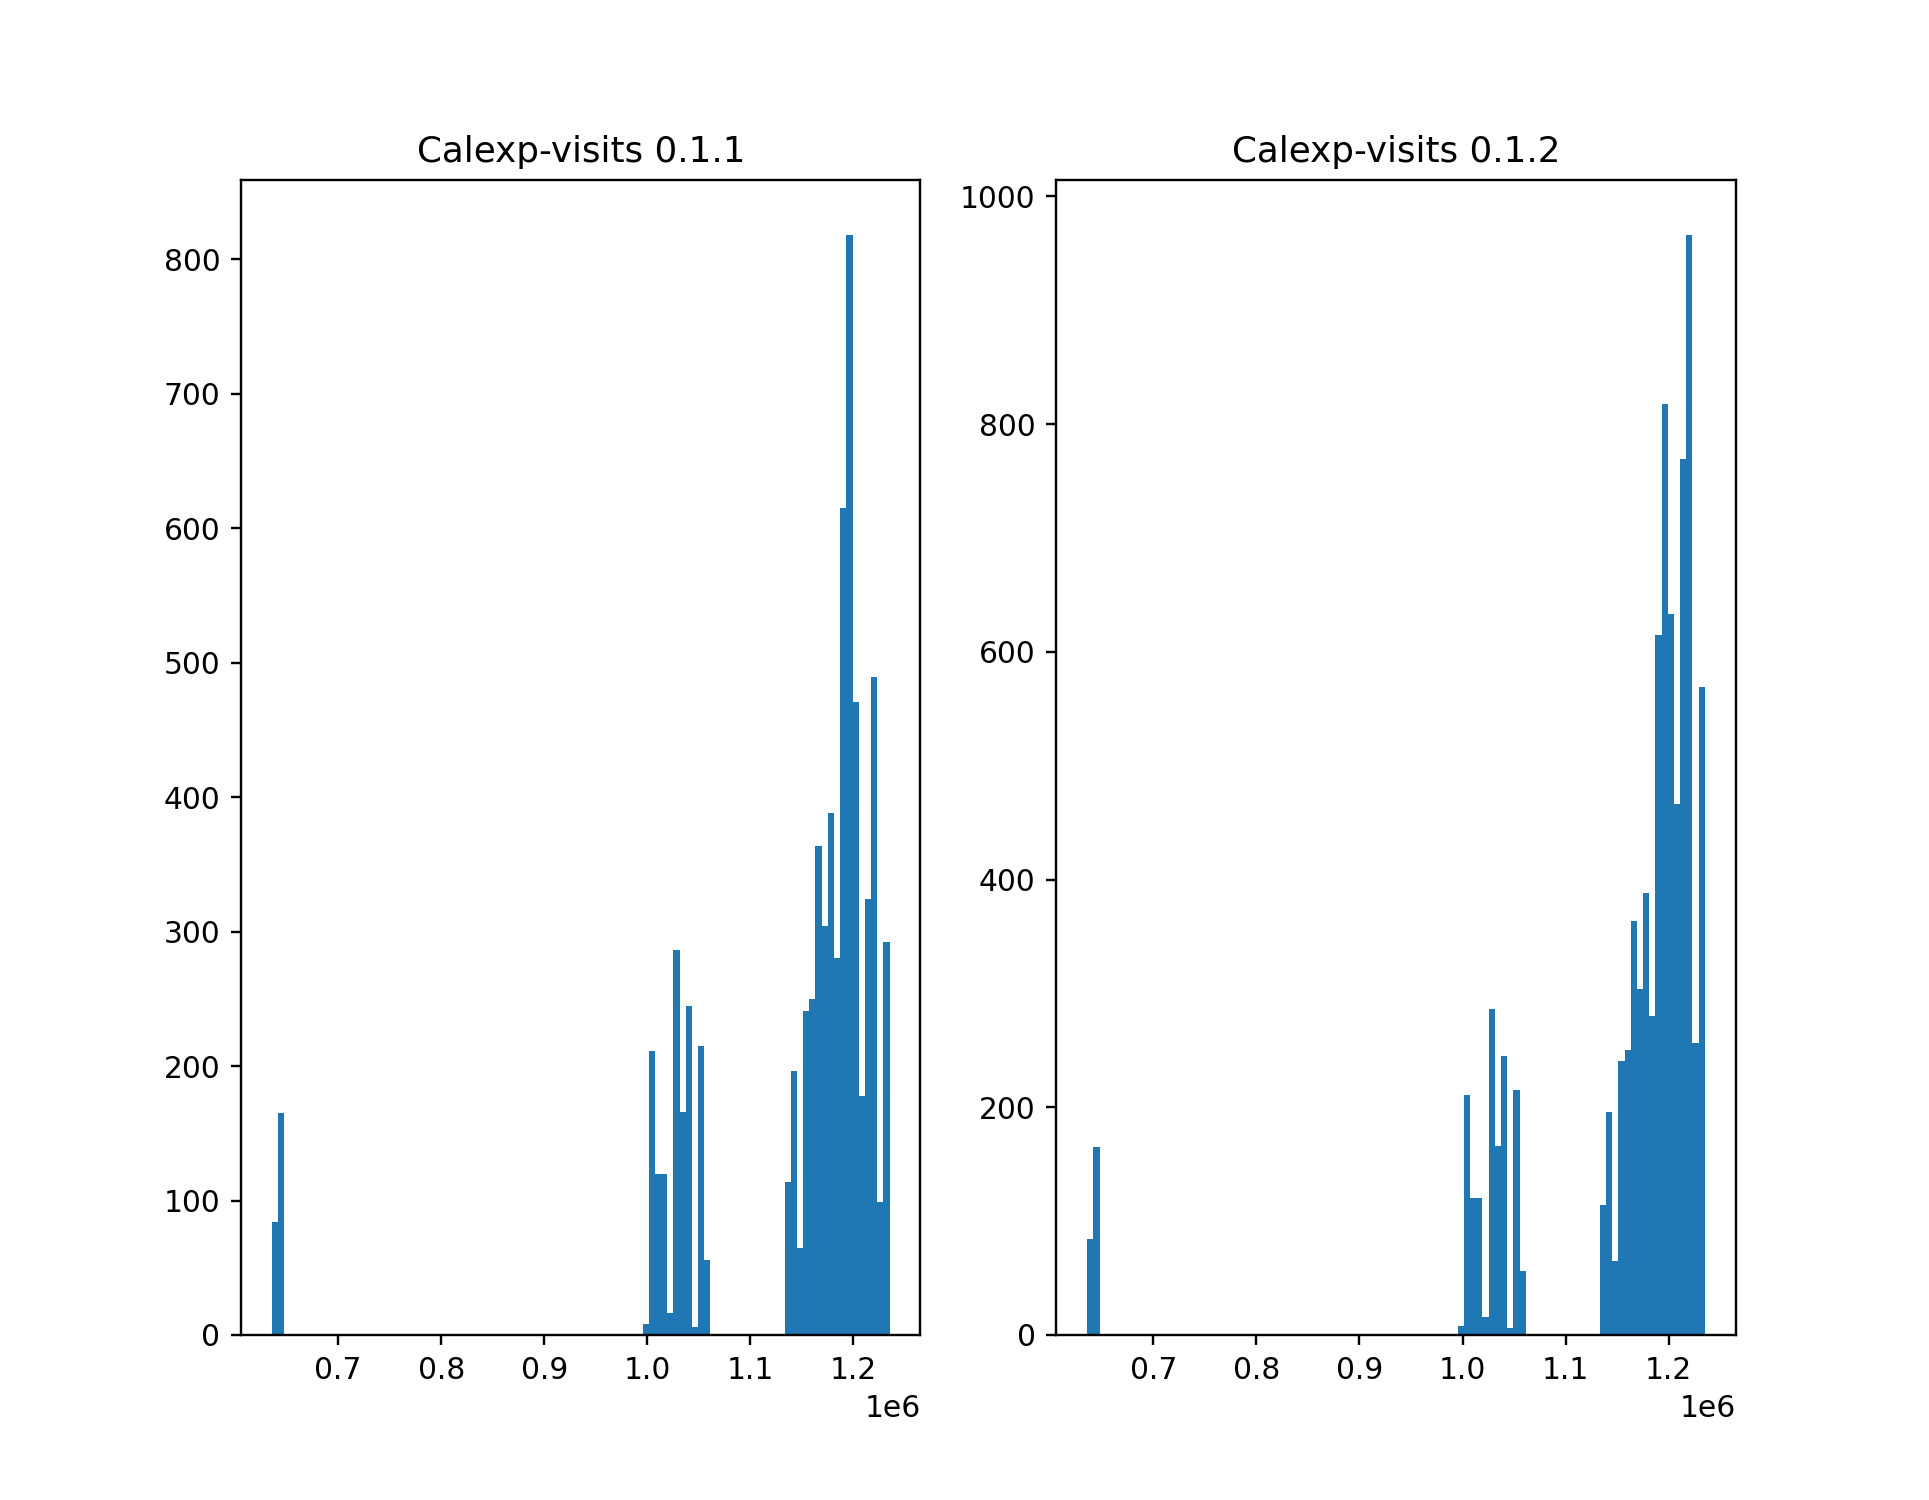

Text(0.5, 1.0, 'Calexp-visits 0.1.2')

In [91]:
r = butler.registry.queryDataIds(['visit','detector'],
                                 datasets='calexp',
                                 collections=[calexp_collection1])

rr = list(r)
visits1 = [d['visit'] for d in rr]

r = butler.registry.queryDataIds(['visit','detector'],
                                 datasets='calexp',
                                 collections=[calexp_collection2])

rr = list(r)
visits2 = [d['visit'] for d in rr]


plt.figure(figsize=[9,7])
plt.subplot(121)
plt.hist(visits1, bins=100)
plt.title('Calexp-visits 0.1.1')

plt.subplot(122)
plt.hist(visits2, bins=100)
plt.title('Calexp-visits 0.1.2')


### Compare a pair of triplets, component by component 

In [5]:
dataId = {'instrument': 'LSSTCam-imSim',
          'visit': 1006008,
          'detector': 80}

<IPython.core.display.Javascript object>


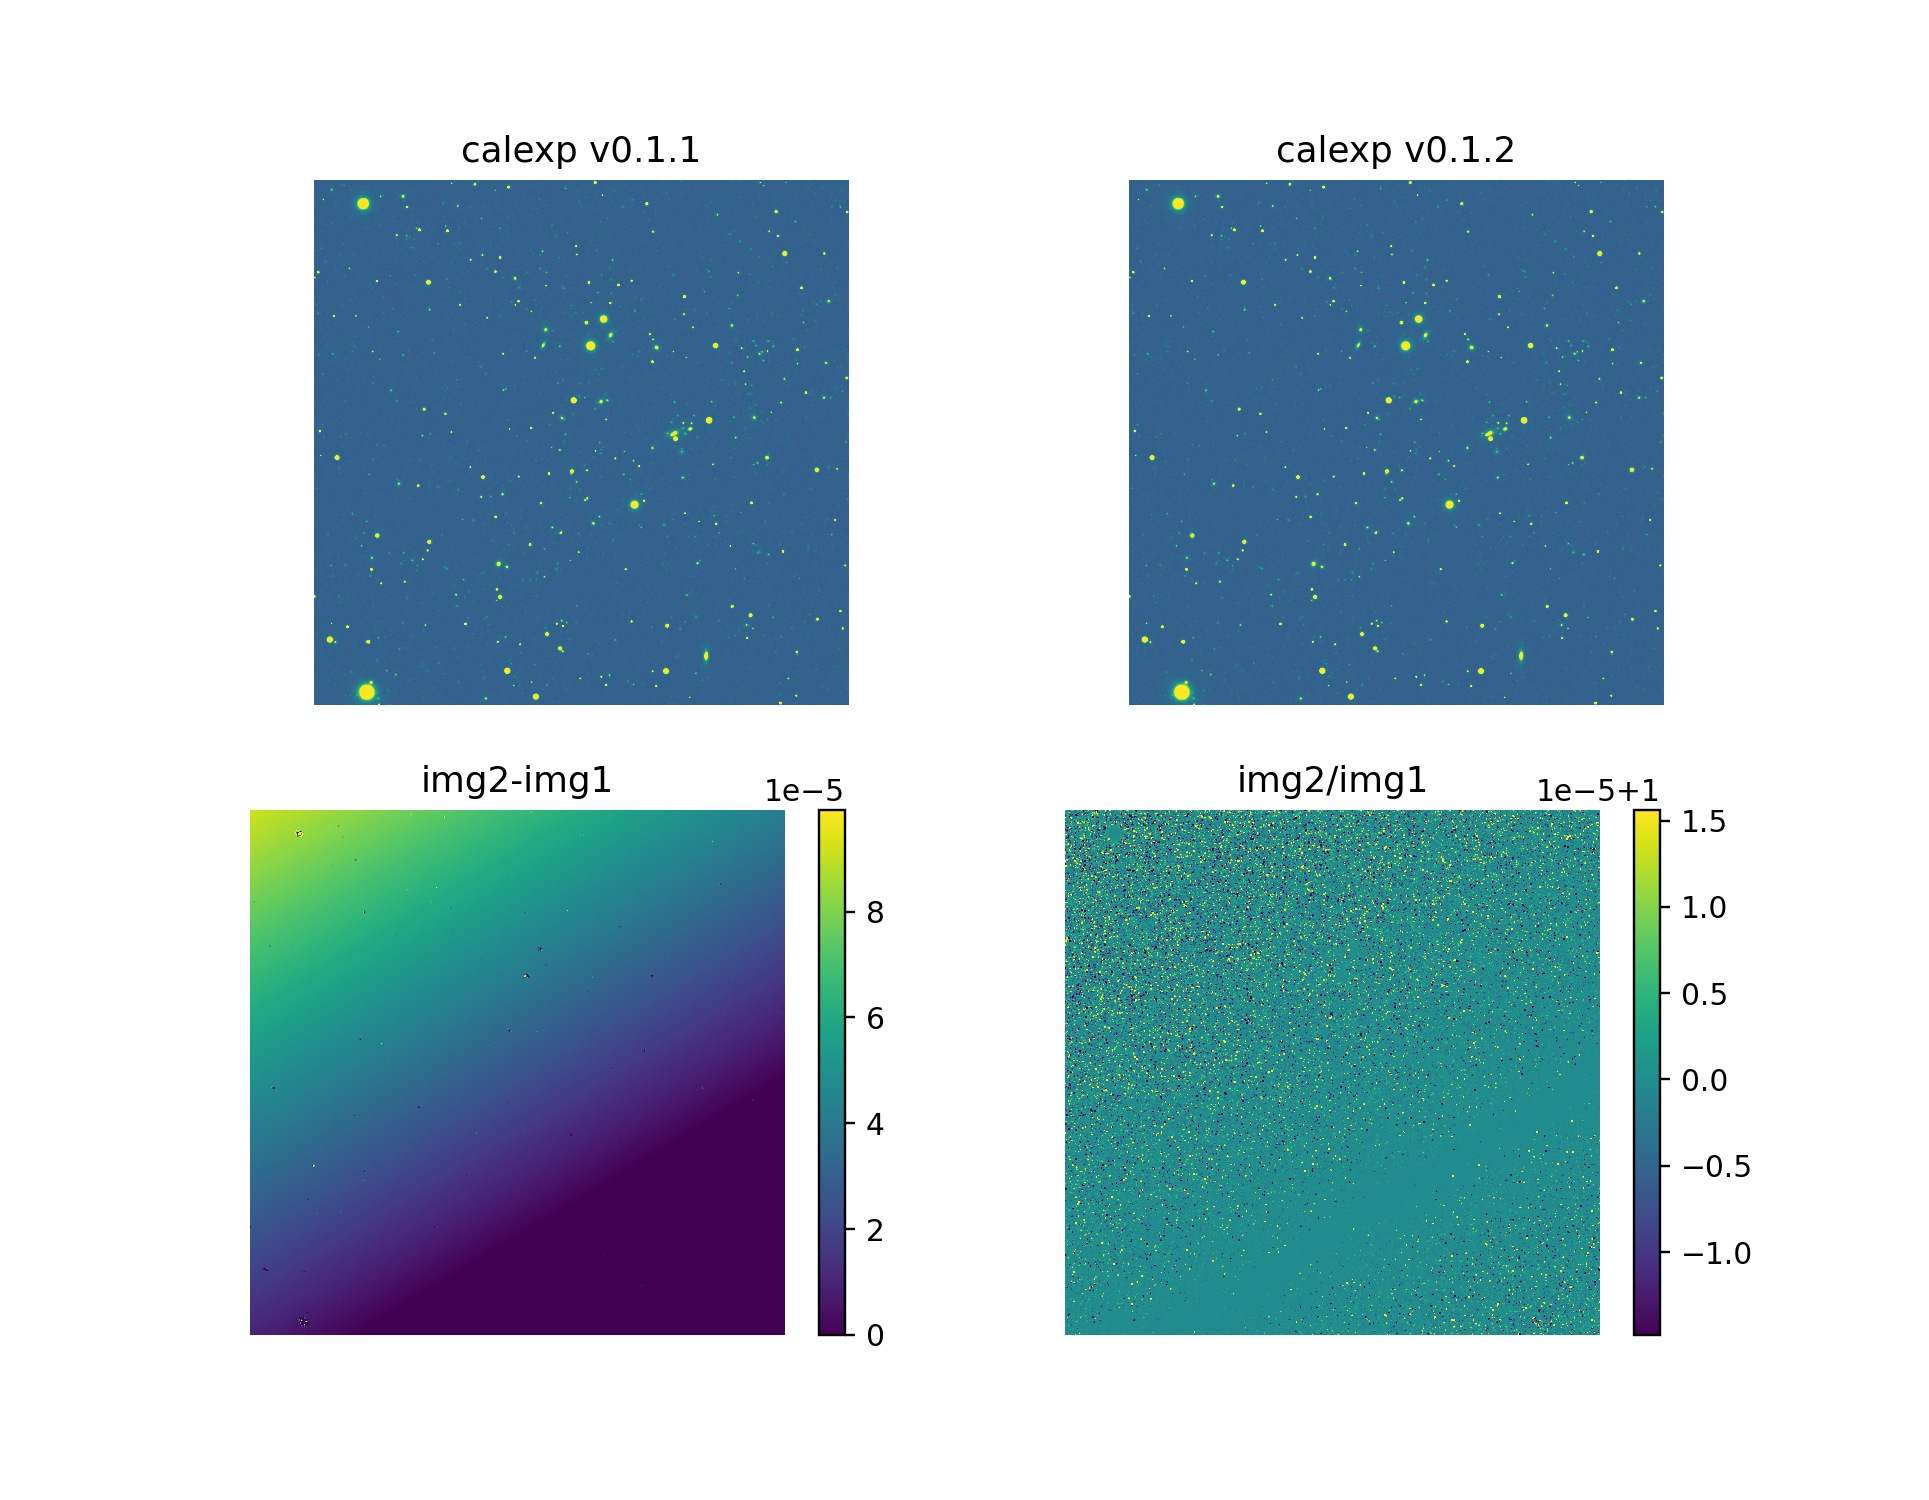

In [108]:
calexp_v1 = butler.get('calexp',
                      collections=[calexp_collection1],
                      dataId=dataId)

calexp_v2 = butler.get('calexp',
                      collections=[calexp_collection2],
                      dataId=dataId)



img1 = calexp_v1.maskedImage.image.array
img2 = calexp_v2.maskedImage.image.array

plt.figure(figsize=[9,7])
plt.subplot(221)
good_imshow(img1, title='calexp v0.1.1')

plt.subplot(222)
good_imshow(img2, title='calexp v0.1.2')

plt.subplot(223)
good_imshow(img2-img1, title='img2-img1')
plt.colorbar()

plt.subplot(224)
good_imshow(img2/(img1+1e-7), title='img2/img1')
plt.colorbar()

<IPython.core.display.Javascript object>


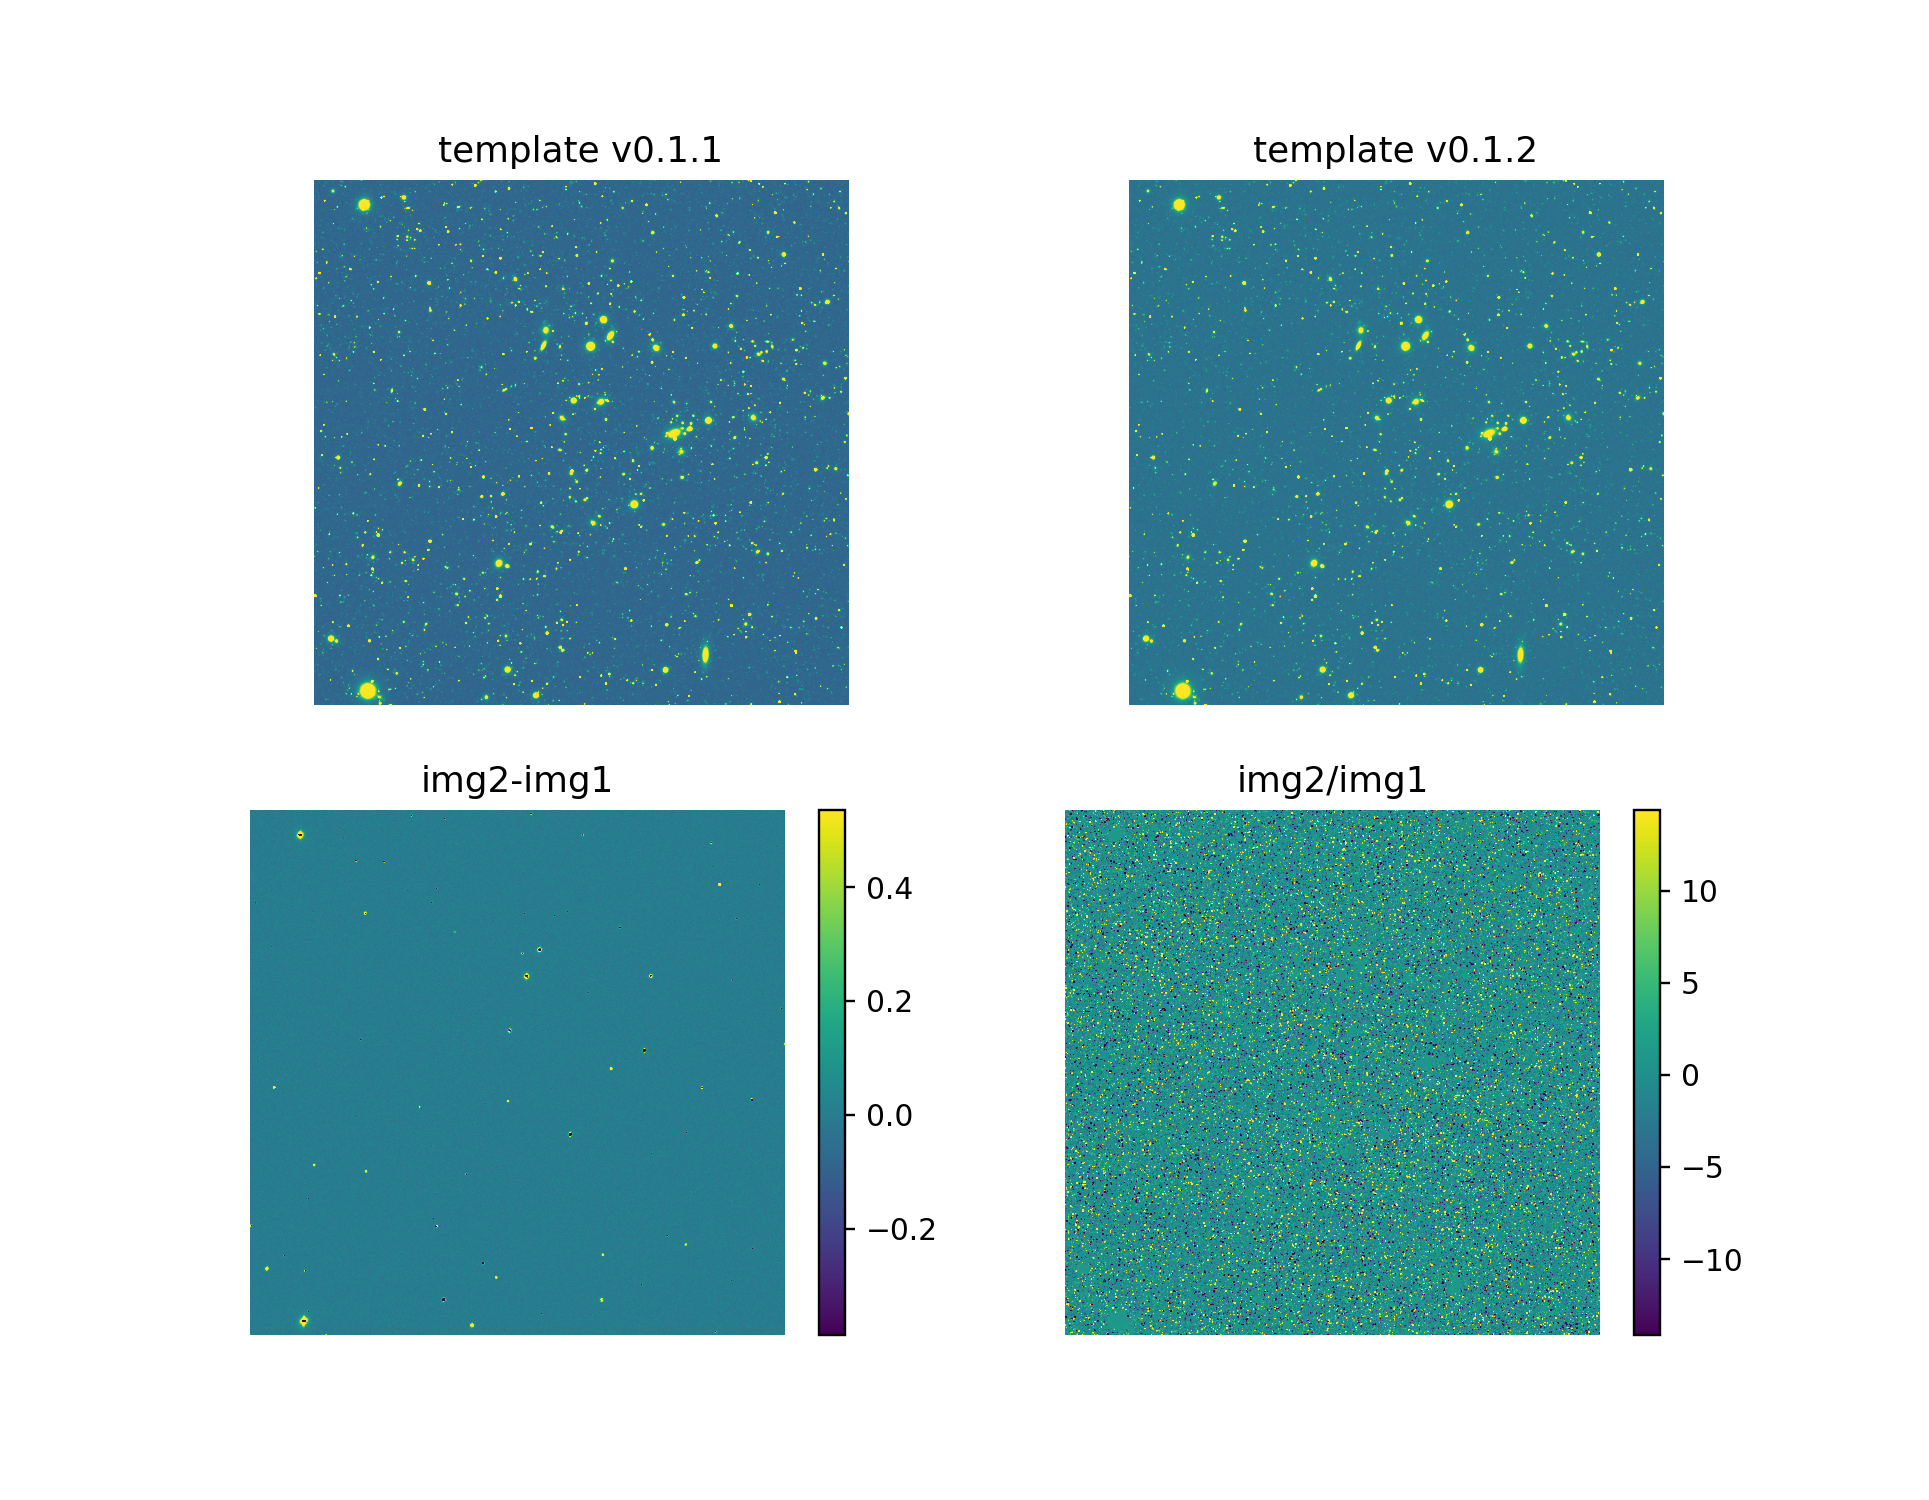

In [112]:
template_v1 = butler.get('goodSeeingDiff_templateExp',
                      collections=[template_collection1],
                      dataId=dataId)

template_v2 = butler.get('goodSeeingDiff_templateExp',
                      collections=[template_collection2],
                      dataId=dataId)

img1 = template_v1.maskedImage.image.array
img2 = template_v2.maskedImage.image.array

plt.figure(figsize=[9,7])

plt.subplot(221)
good_imshow(img1, title='template v0.1.1')

plt.subplot(222)
good_imshow(img2, title='template v0.1.2')

plt.subplot(223)
good_imshow(img2-img1, title='img2-img1')
plt.colorbar()

plt.subplot(224)
good_imshow(img2/(img1+1e-7), title='img2/img1')
plt.colorbar()

<IPython.core.display.Javascript object>


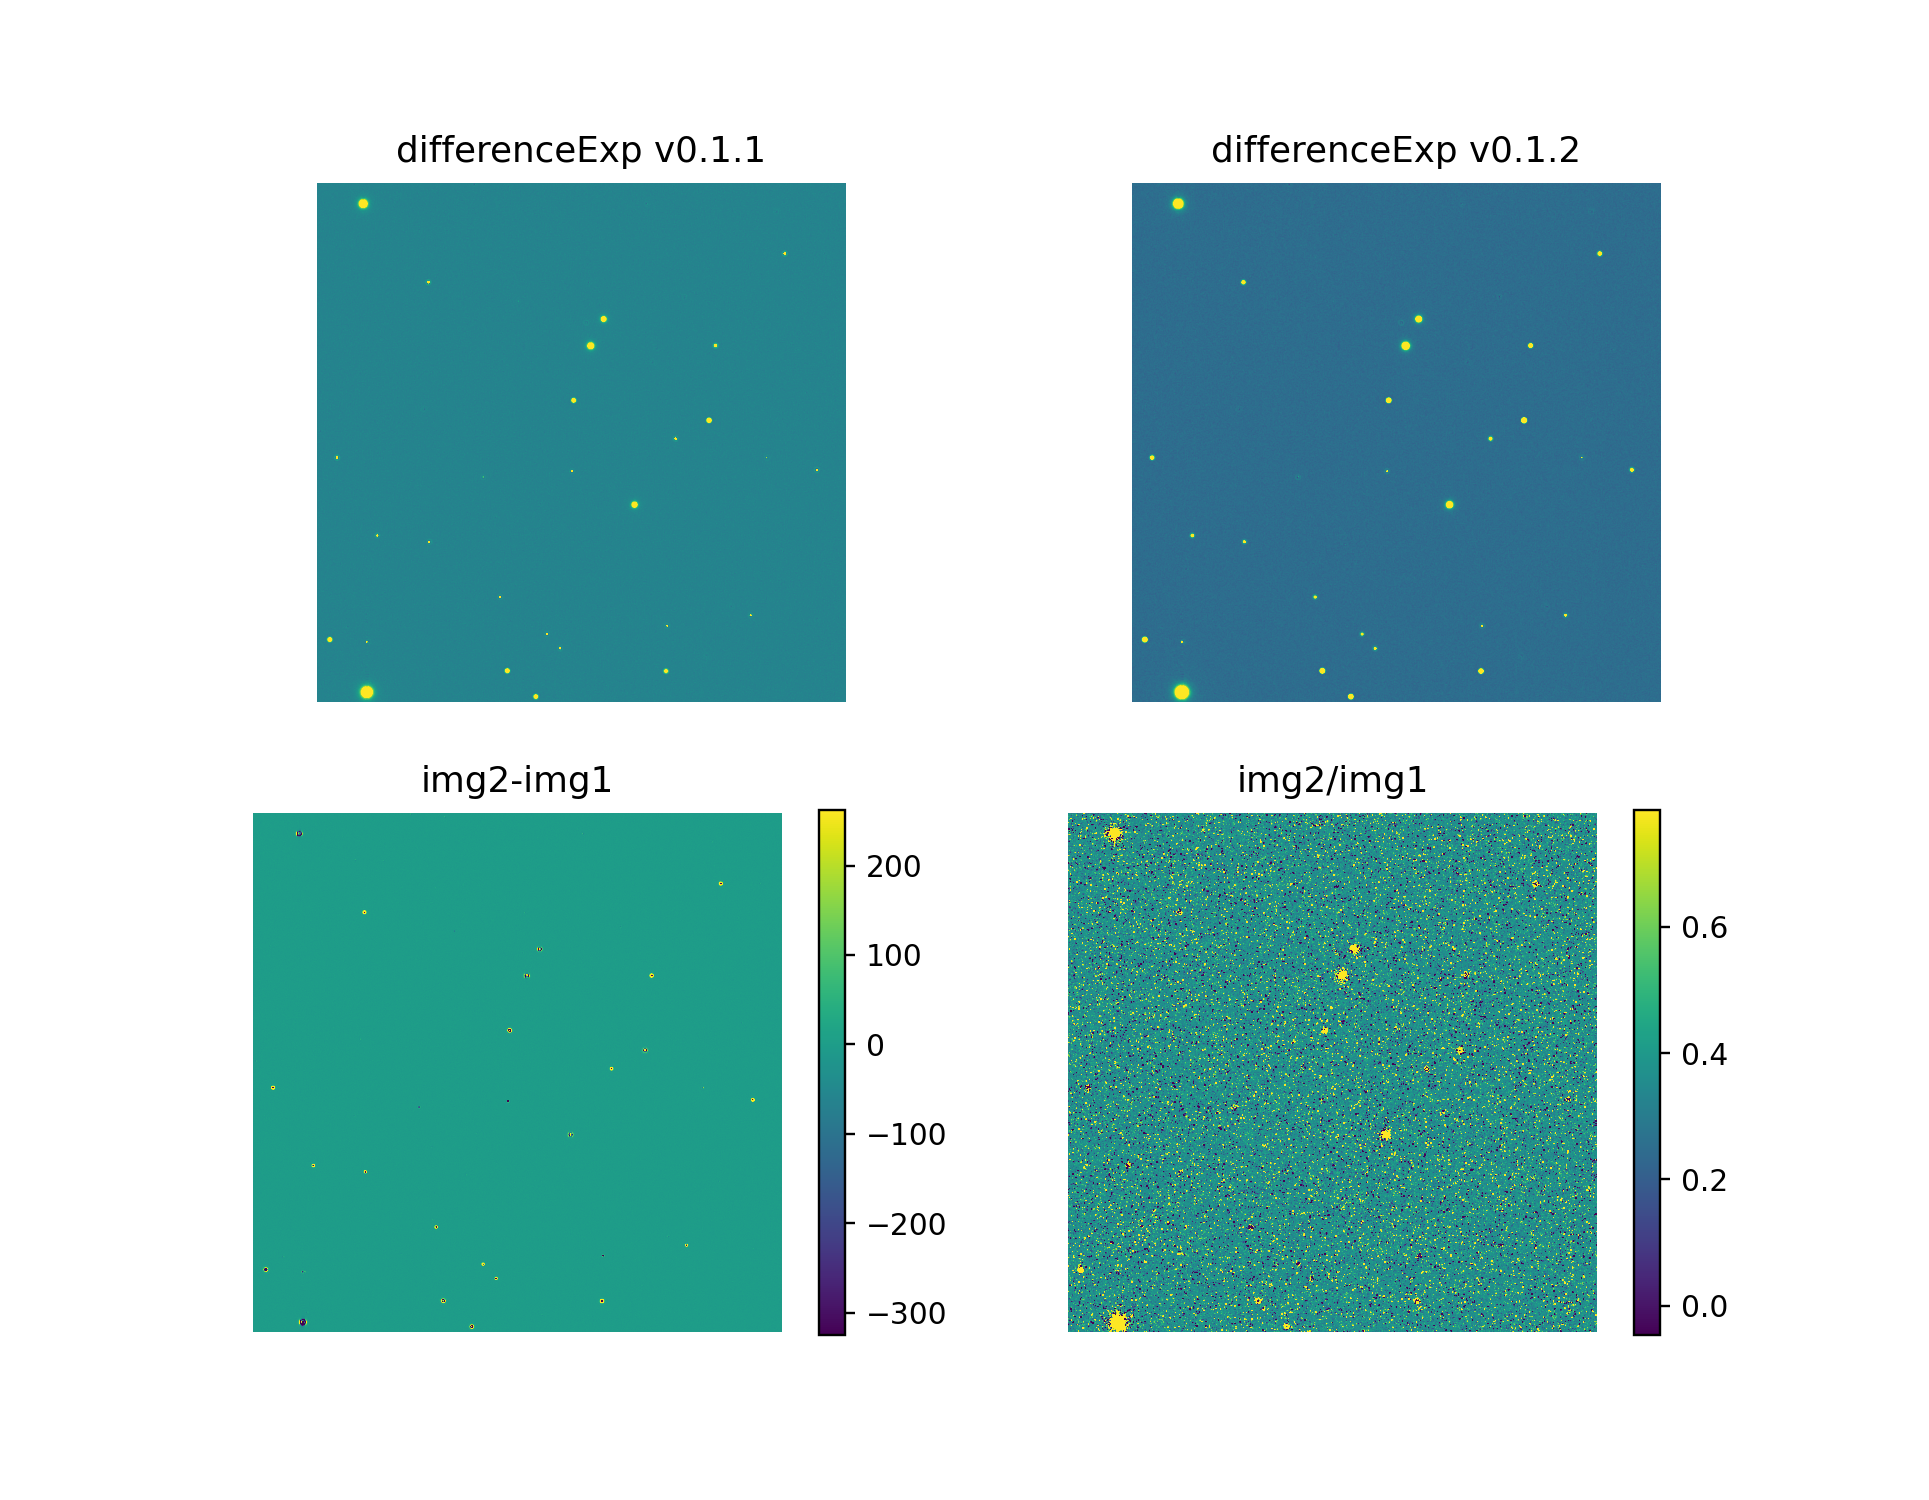

In [115]:
difference_v1 = butler.get('goodSeeingDiff_differenceExp',
                      collections=[diff_collection1],
                      dataId=dataId)

difference_v2 = butler.get('goodSeeingDiff_differenceExp',
                      collections=[diff_collection2],
                      dataId=dataId)

img1 = difference_v1.maskedImage.image.array
img2 = difference_v2.maskedImage.image.array

plt.figure(figsize=[9,7])

plt.subplot(221)
good_imshow(img1, title='differenceExp v0.1.1')

plt.subplot(222)
good_imshow(img2, title='differenceExp v0.1.2')

plt.subplot(223)
good_imshow(img2-img1, title='img2-img1')
plt.colorbar()

plt.subplot(224)
good_imshow(img2/(img1+1e-7), title='img2/img1')
plt.colorbar()

### Let's compare the diaSources

In [6]:
dia_v1 = butler.get('goodSeeingDiff_diaSrcTable',
                    collections=[diff_collection1],
                    dataId=dataId)

dia_v2 = butler.get('goodSeeingDiff_diaSrcTable',
                    collections=[diff_collection2],
                    dataId=dataId)


In [7]:
len(dia_v1), len(dia_v2)

(30, 43)

<IPython.core.display.Javascript object>


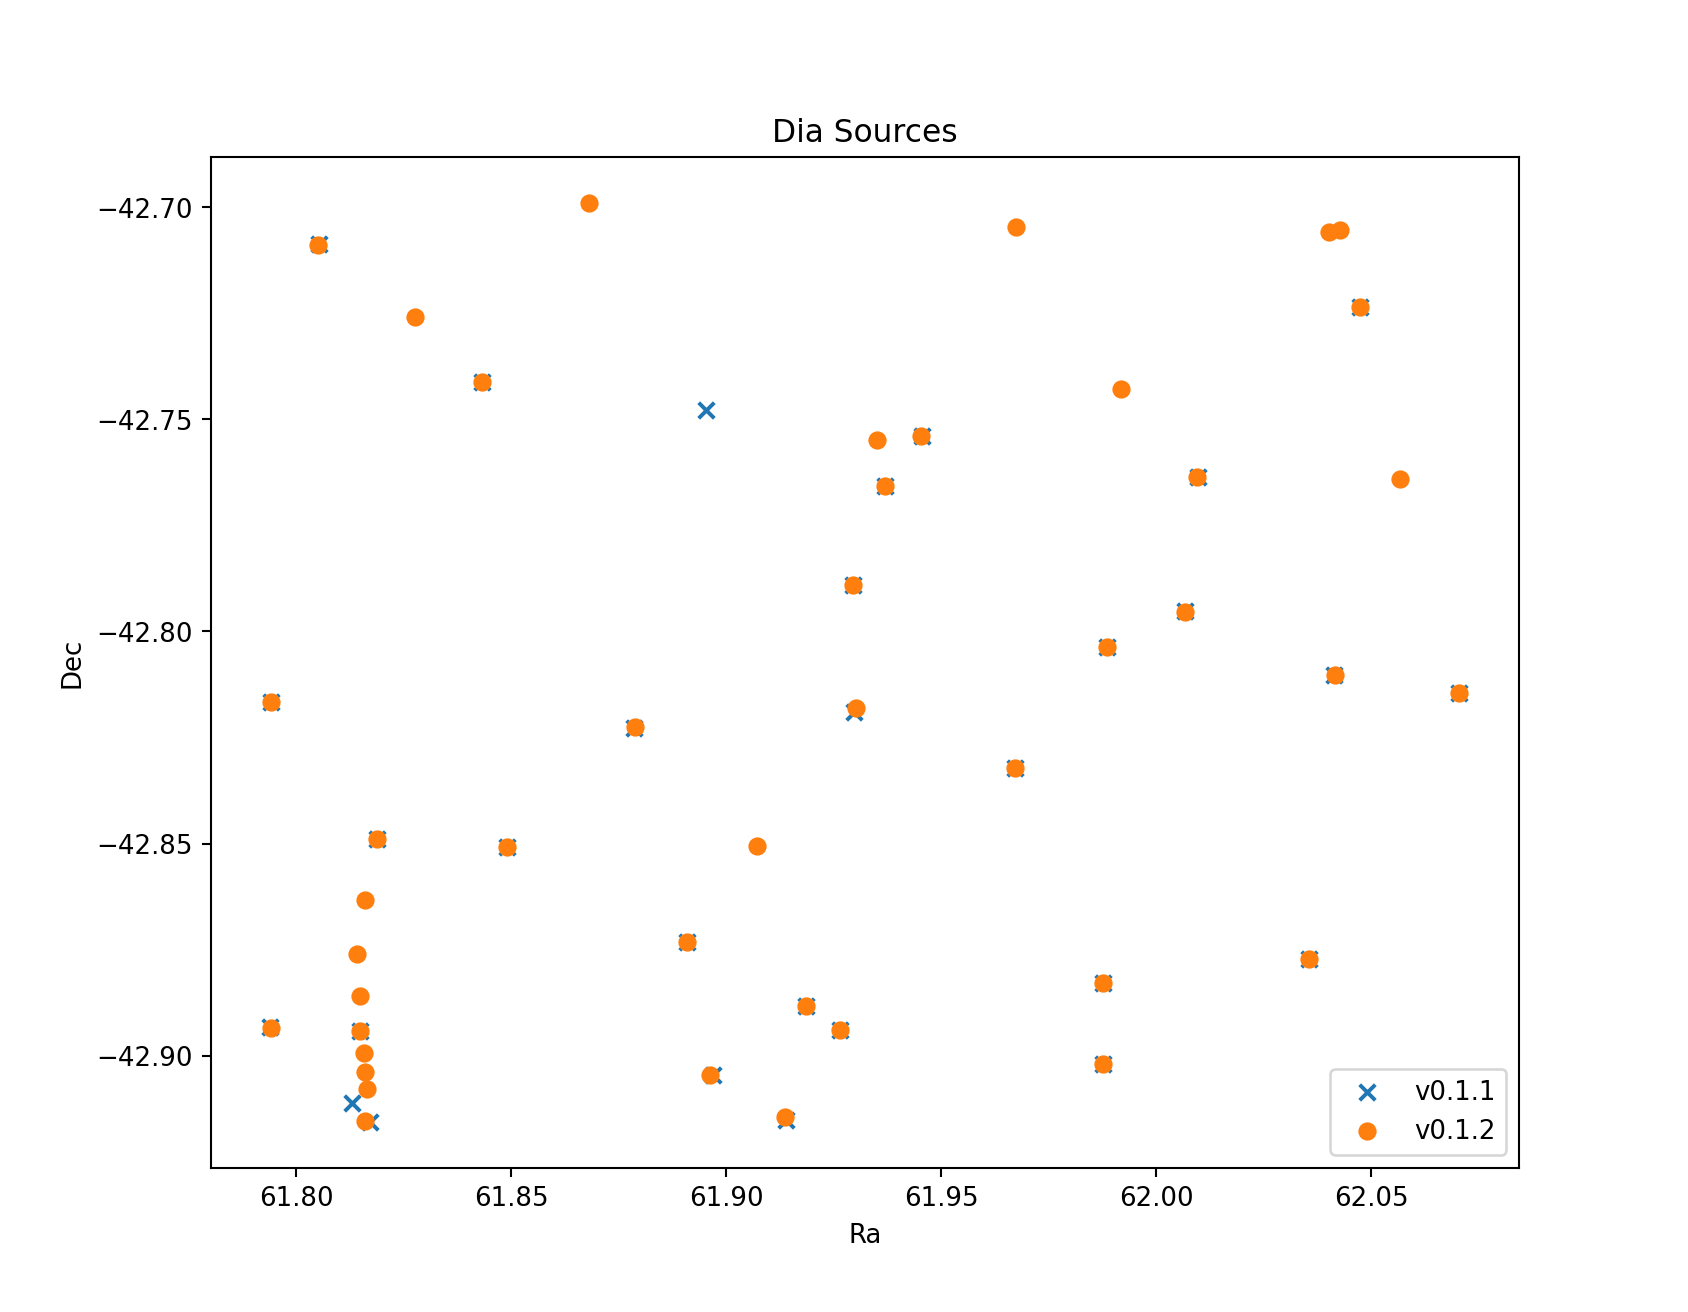

Text(0.5, 1.0, 'Dia Sources')

In [10]:
plt.figure(figsize=[9,7])
plt.scatter(dia_v1.ra.values, dia_v1.decl.values, marker='x')
plt.scatter(dia_v2.ra.values, dia_v2.decl.values, marker='o')
plt.legend(['v0.1.1', 'v0.1.2'])
plt.xlabel('Ra')
plt.ylabel('Dec')
plt.title('Dia Sources')

Visually they compare OK, but the difference in the counts is more noticeable: 30 vs. 43 which amounts to some 30% difference!